# 1. Data inspection

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import researchpy as rp 
import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline

import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing

In [34]:
df = pd.read_excel("data.xlsx")

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
df.shape

(303, 14)

In [37]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Understanding dataset

# 2. Data Cleaning

In [39]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [40]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##### *Checking the mistakes in data characters

In [41]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [42]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

##### * Feature 'ca'ranges from 0–3, however, df.nunique() listed 0–4. There are five values of ‘0’. So lets change them to NaN. 

In [43]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [44]:
df.loc[df['ca']==4, 'ca'] =np.NaN

In [45]:
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

##### * Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN.

In [46]:
df['thal'].unique()

array([1, 2, 3, 0])

In [47]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [48]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [49]:
df.loc[df['thal']==0, 'thal'] =np.NaN

In [50]:
df['thal'].unique()

array([ 1.,  2.,  3., nan])

##### *Checking for nullvalues

In [51]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

<AxesSubplot:>

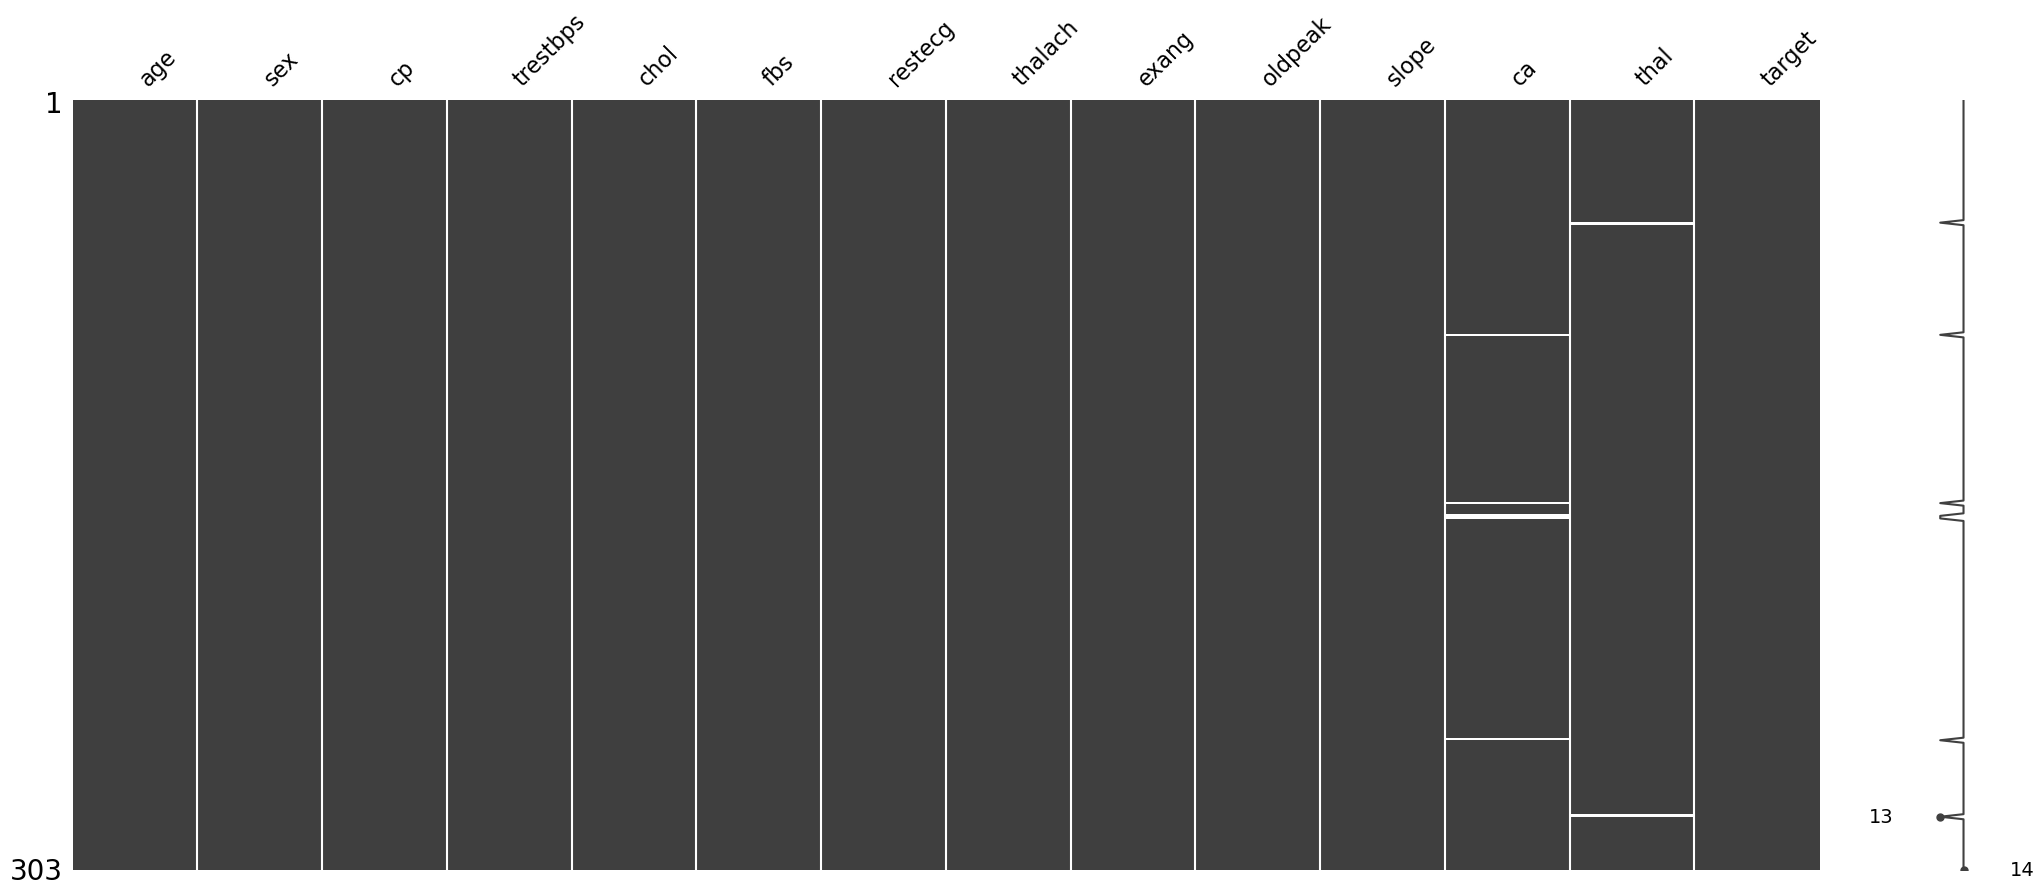

In [52]:
msno.matrix(df)

##### *Replace the NaN with median

In [53]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Identifying and removing duplicates

In [54]:
duplicated = df.duplicated() .sum ()
if duplicated:
    print('Duplicated Rows in Dataset are: {}'.format(duplicated))
else:
    print('Dataset contains no Duplicate values')

Duplicated Rows in Dataset are: 1


In [55]:
duplicated = df[df.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [56]:
df.drop_duplicates(keep='first').shape

(302, 14)

### *Before we plot the outliers, let's change the labeling for better visualization and interpretation.

In [57]:
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['cp'] = df.cp.replace({0: "asymtomatic", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "typical"})
df['slope'] = df.slope.replace({0: "downsloping",
                                1: "flat",
                                2: "upsloping"})
df['thal'] = df.thal.replace({1: "normal",
                              2: "fixed_defect",
                              3: "reversible_defect"})
df['restecg'] = df.restecg.replace({0: "left ventricular hypertrophy",
                                    1: "normal",
                                    2: "ST-T wave abnormality"})

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical,145,233,True,left ventricular hypertrophy,150,No,2.3,downsloping,0.0,normal,Disease
1,37,Male,non-anginal pain,130,250,False,normal,187,No,3.5,downsloping,0.0,fixed_defect,Disease
2,41,Female,atypical_angina,130,204,False,left ventricular hypertrophy,172,No,1.4,upsloping,0.0,fixed_defect,Disease
3,56,Male,atypical_angina,120,236,False,normal,178,No,0.8,upsloping,0.0,fixed_defect,Disease
4,57,Female,asymtomatic,120,354,False,normal,163,Yes,0.6,upsloping,0.0,fixed_defect,Disease


# 3. 
### Outliers

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    float64
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 33.3+ KB


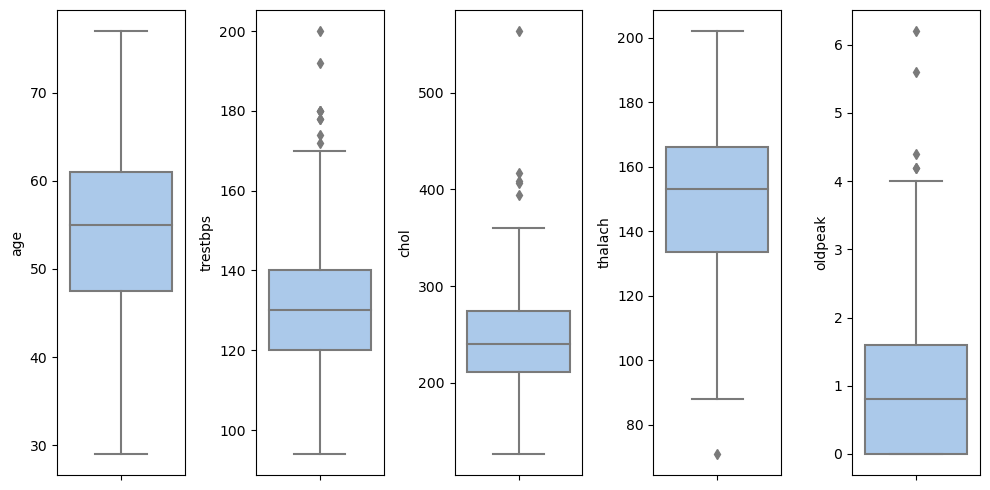

In [60]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=df[col_num[i]], palette='pastel')
    plt.tight_layout()

#### *Removing the outliers

In [61]:
for i in col_num:
    Q1 = df[i].quantile(0.25) 
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1 
    LowerBound = Q1 - (1.5 * IQR) 
    UpperBound = Q3 + (1.5 * IQR) 
    
    df = df[(df[i] >= LowerBound)&(df[i] <= UpperBound)]

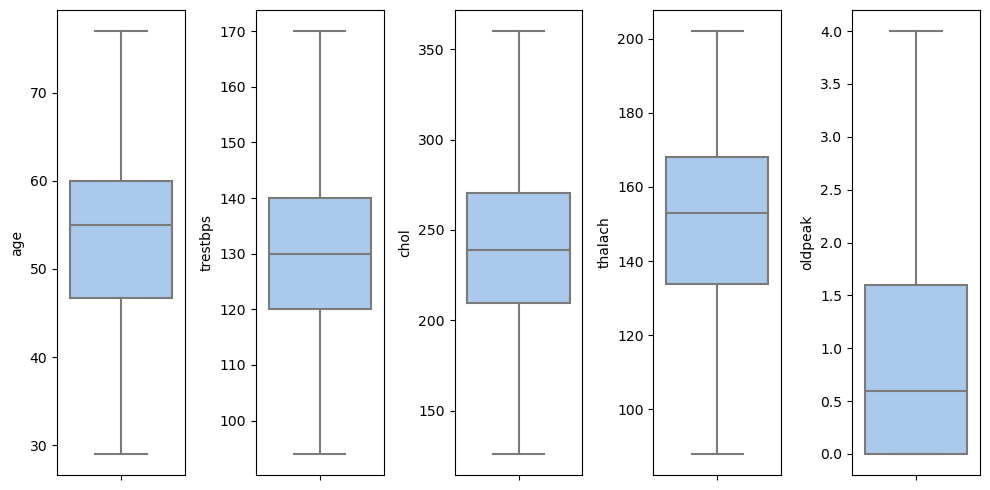

In [62]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = df[col_num[i]], palette='pastel')
    plt.tight_layout()

In [108]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,53.992958,129.911972,242.077465,150.042254,0.948592,0.637324
std,9.161678,15.368133,44.753834,22.692716,1.026141,0.904727
min,29.000000,94.000000,126.000000,88.000000,0.000000,0.000000
25%,46.750000,120.000000,209.750000,133.750000,0.000000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000,0.000000
75%,60.000000,140.000000,270.250000,168.000000,1.600000,1.000000
max,77.000000,170.000000,360.000000,202.000000,4.000000,3.000000


# Week 1

# Performing EDA

# 4.

### categorical: sex, cp, fbs, restecg, exang, slope, ca, thal.
### Continuous: age, trestbps, chol, thalac, oldpeak.

In [64]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [65]:
categoric_cols = ['sex', 'cp', 'fbs', 'restecg', 
                  'exang', 'slope', 'ca', 'thal']

In [66]:
for i in categoric_cols:
     print('all value in column {0} : \n{1}'.format(i, df[i].value_counts().sort_index()))

all value in column sex : 
Female     85
Male      199
Name: sex, dtype: int64
all value in column cp : 
asymtomatic         130
atypical_angina      49
non-anginal pain     83
typical              22
Name: cp, dtype: int64
all value in column fbs : 
False    244
True      40
Name: fbs, dtype: int64
all value in column restecg : 
ST-T wave abnormality             2
left ventricular hypertrophy    137
normal                          145
Name: restecg, dtype: int64
all value in column exang : 
No     194
Yes     90
Name: exang, dtype: int64
all value in column slope : 
downsloping     16
flat           130
upsloping      138
Name: slope, dtype: int64
all value in column ca : 
0.0    170
1.0     63
2.0     35
3.0     16
Name: ca, dtype: int64
all value in column thal : 
fixed_defect         162
normal                17
reversible_defect    105
Name: thal, dtype: int64


# Countplot

In [67]:
count = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'target']

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


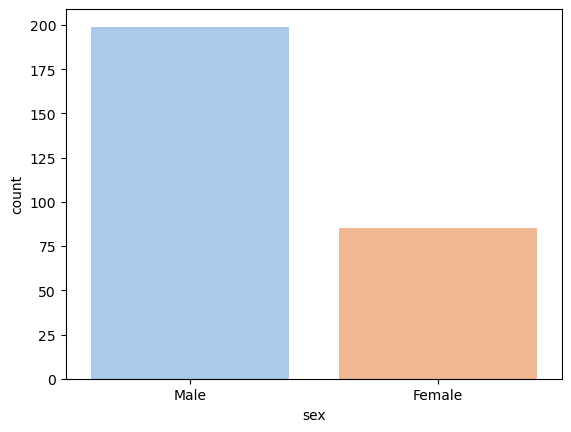

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


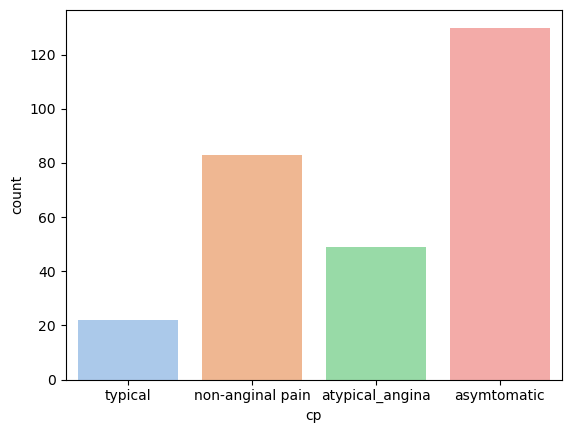

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


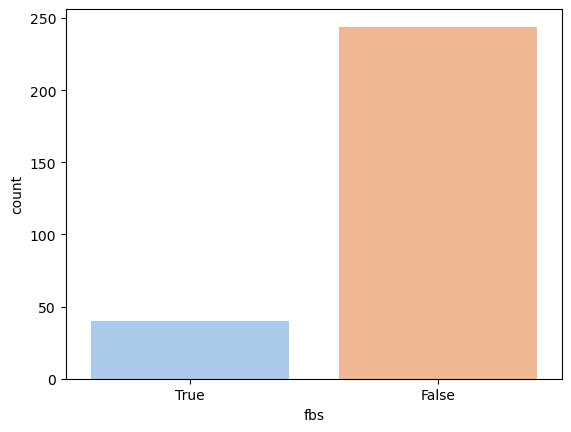

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


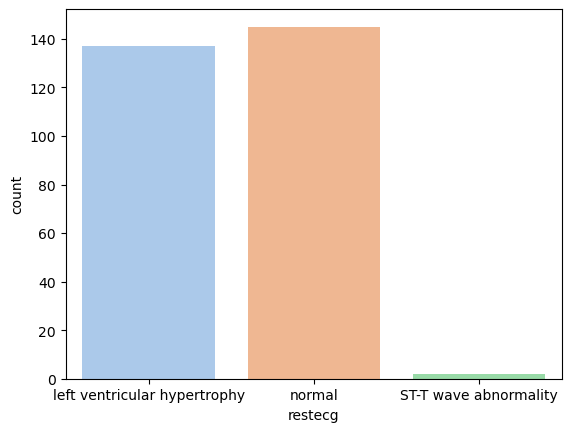

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


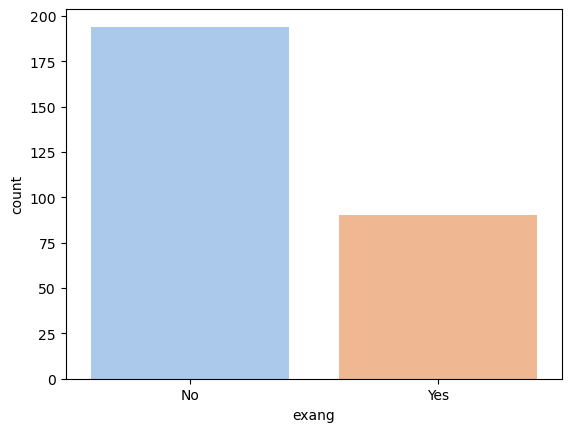

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


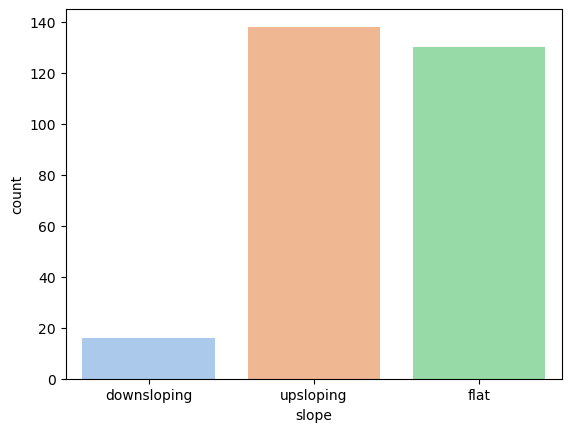

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


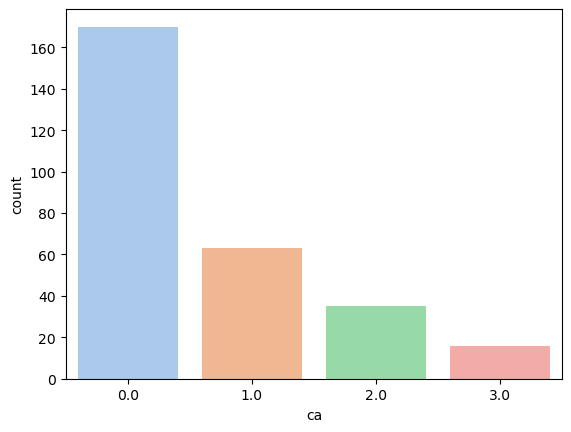

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


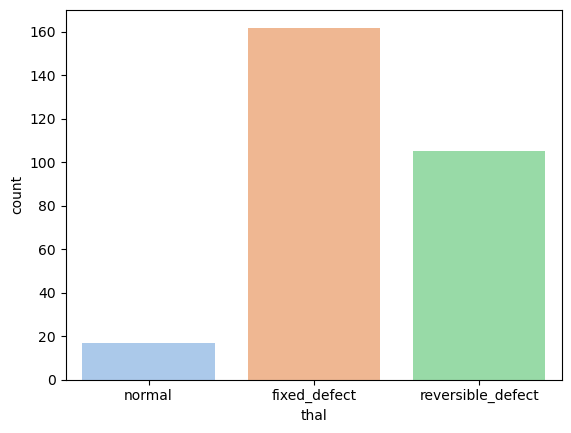

/Users/bella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


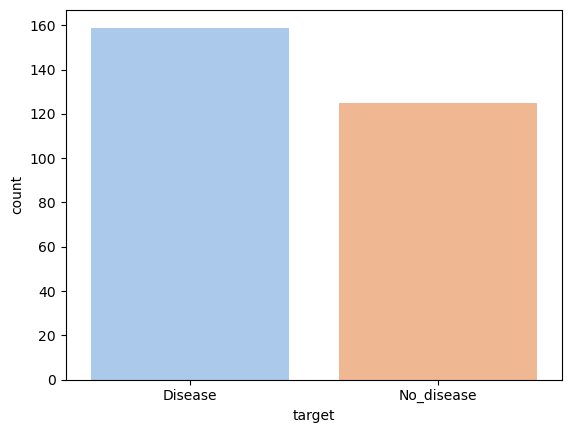

In [68]:
for i in count:
    sns.countplot(df[i], palette = 'pastel')
    plt.show()

# Histogram

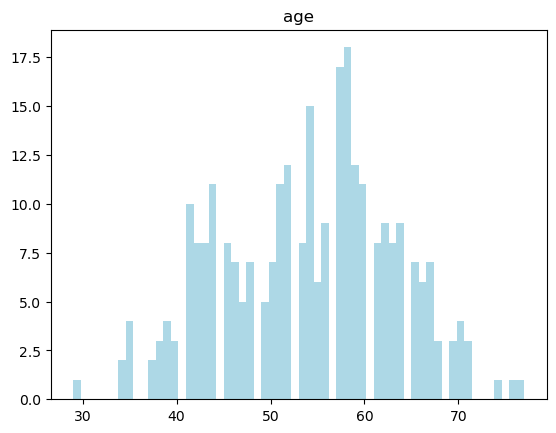

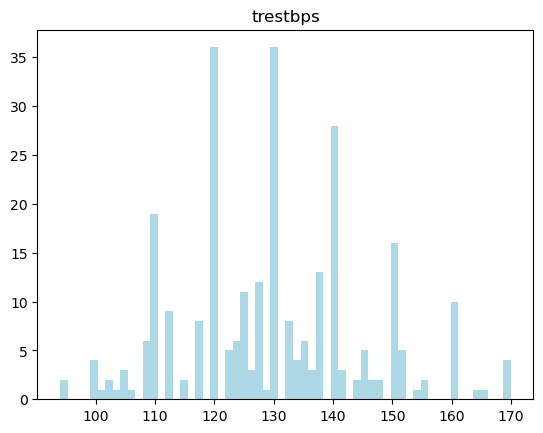

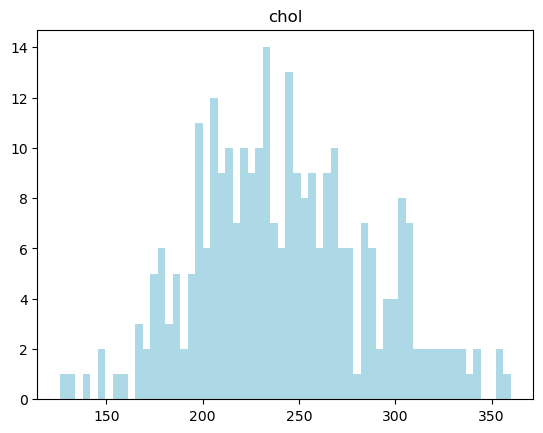

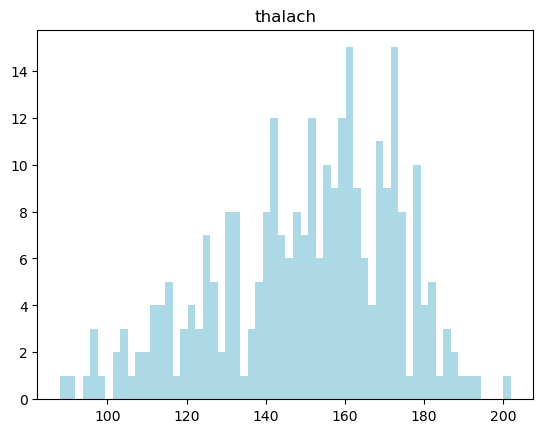

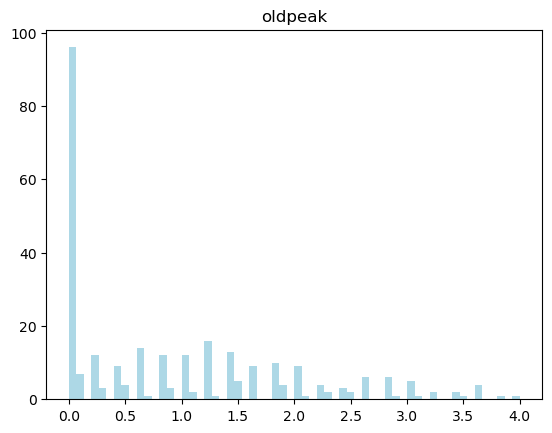

In [69]:
i = ['age', 'trestbps', 'chol','thalach','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'lightblue')
    plt.title(j)
    plt.show()

# 5.

In [70]:
df.groupby(['age', 'sex']).size()

age  sex   
29   Male      1
34   Female    1
     Male      1
35   Female    1
     Male      3
              ..
70   Male      4
71   Female    3
74   Female    1
76   Female    1
77   Male      1
Length: 72, dtype: int64

In [71]:
print(df.age.max())
print(df.age.min())
print(df.age.mean())

77
29
53.99295774647887


In [72]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [73]:
freq_df

age
Less than 10      0
10-20             0
20-30             1
30-40            18
40-50            76
50-60           119
60-70            64
70 and more       6
dtype: int64

In [74]:
freq_df = freq_df.reset_index(name="count")
freq_df

,age,count
0,Less than 10,0
1,10-20,0
2,20-30,1
3,30-40,18
4,40-50,76
5,50-60,119
6,60-70,64
7,70 and more,6


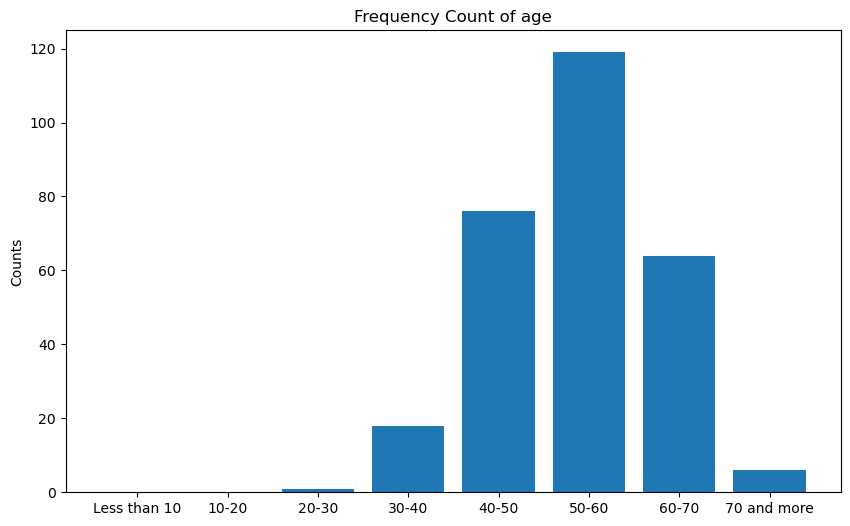

In [75]:
plt.figure(figsize=(10,6))
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of age')
plt.show()

### *Age is normally distributed

58    18
57    17
54    15
52    12
59    12
51    11
44    11
60    11
41    10
56     9
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

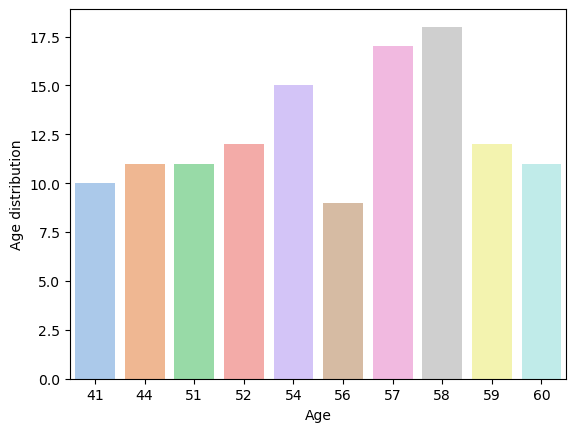

In [76]:
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values,
palette='pastel')
plt.xlabel('Age')
plt.ylabel('Age distribution')

#### Most of the patients are in the age between 50s to 60s. Let’s take a quick look basic stats. The mean age is about 54 years with ±9.08 std, the youngest is at 29 and the oldest is at 77.

# 6.

In [77]:
df.groupby(['trestbps', 'target']).size()

trestbps  target    
94        Disease       2
100       Disease       2
          No_disease    2
101       Disease       1
102       Disease       2
                       ..
160       No_disease    5
164       No_disease    1
165       No_disease    1
170       Disease       1
          No_disease    3
Length: 68, dtype: int64

In [78]:
print(df.trestbps.max())
print(df.trestbps.min())
print(df.trestbps.mean())

170
94
129.91197183098592


In [79]:
labels = ["Less than 20","20-40","40-60","60-80","80-100","100-120","120-140","140 and more"]
bins= [0,20,40,60,80,100,120,140,160]
trstfreq_df = df.groupby(pd.cut(df['trestbps'], bins=bins,labels=labels)).size()

In [80]:
trstfreq_df

trestbps
Less than 20      0
20-40             0
40-60             0
60-80             0
80-100            6
100-120          88
120-140         136
140 and more     48
dtype: int64

In [81]:
trstfreq_df = trstfreq_df.reset_index(name="count")
trstfreq_df

,trestbps,count
0,Less than 20,0
1,20-40,0
2,40-60,0
3,60-80,0
4,80-100,6
5,100-120,88
6,120-140,136
7,140 and more,48


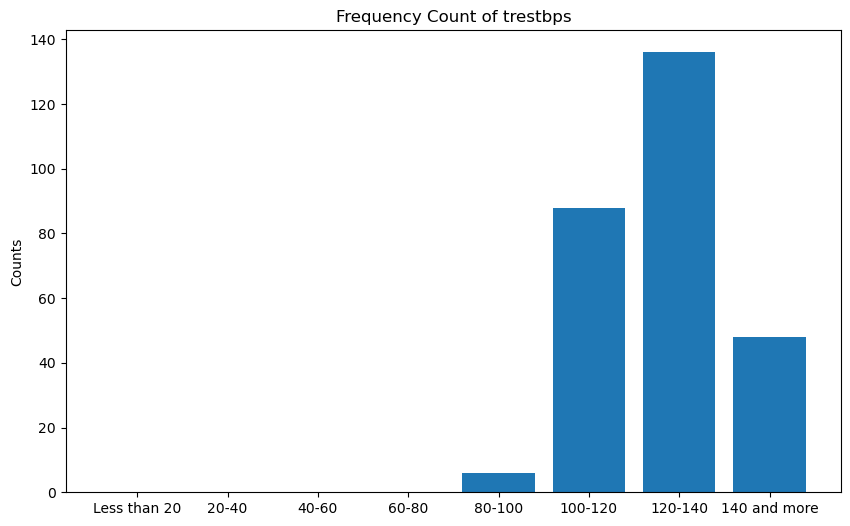

In [82]:
plt.figure(figsize=(10,6))
plt.bar(trstfreq_df['trestbps'],trstfreq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of trestbps')
plt.show()

### *We observe many patients have their resting blood pressure between 120-140 in mm Hg

(-0.5, 1.5, 0.0, 200.0)

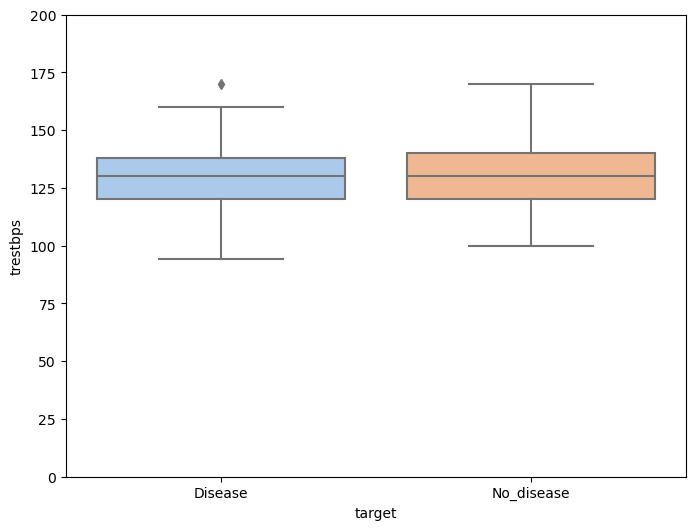

In [83]:
var = 'target'
data = pd.concat([df['trestbps'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="trestbps", data=data, palette='pastel')
fig.axis(ymin=0, ymax=200)

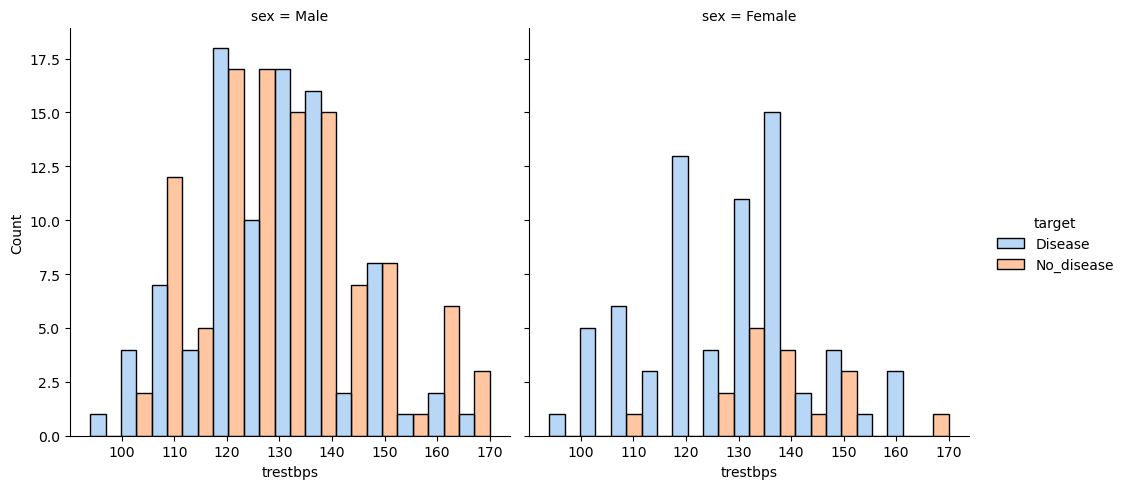

In [84]:
sns.displot(df, x="trestbps", col="sex", hue="target", multiple="dodge", palette='pastel')

### we cannot detect the heart disease based on the anomalies in resting blood pressure

# 7.

In [85]:
df.sex.value_counts()

Male      199
Female     85
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

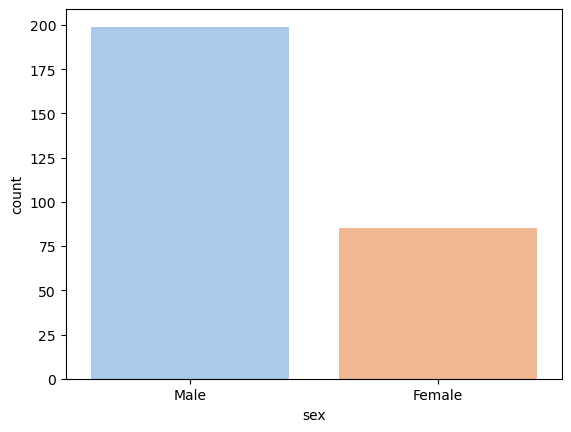

In [86]:
sns.countplot(x='sex', data=df, palette='pastel')

### * There are more Male patients compared to Female patients

In [87]:
rp.crosstab(df['sex'], df['target'])

target                
target Disease No_disease  All
sex                           
Female      68         17   85
Male        91        108  199
All        159        125  284

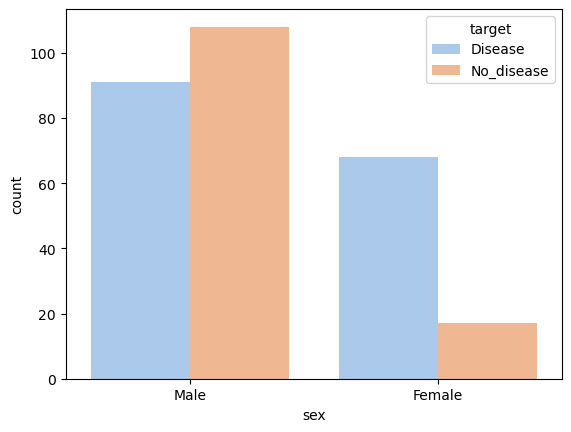

In [88]:
ax= sns.countplot(x='sex', hue='target', data=df, palette='pastel')

# Week 2
# Performing EDA
# 1.

In [89]:
df.groupby(['chol', 'target']).size()

chol  target    
126   Disease       1
131   No_disease    1
141   Disease       1
149   Disease       1
      No_disease    1
                   ..
341   No_disease    1
342   Disease       1
353   No_disease    1
354   Disease       1
360   Disease       1
Length: 188, dtype: int64

In [90]:
print(df.chol.max())
print(df.chol.min())
print(df.chol.mean())

360
126
242.07746478873239


In [96]:
labels = ["Less than 50","50-100","100-150","150-200","200-250","250-300","300-350","350 and more"]
bins= [0,50,100,150,200,250,300,350,400]
chol_df = df.groupby(pd.cut(df['chol'], bins=bins,labels=labels)).size()

In [97]:
chol_df

chol
Less than 50      0
50-100            0
100-150           5
150-200          44
200-250         122
250-300          78
300-350          32
350 and more      3
dtype: int64

In [100]:
chol_df = chol_df.reset_index(name="Count_")
chol_df

,chol,Count_
0,Less than 50,0
1,50-100,0
2,100-150,5
3,150-200,44
4,200-250,122
5,250-300,78
6,300-350,32
7,350 and more,3


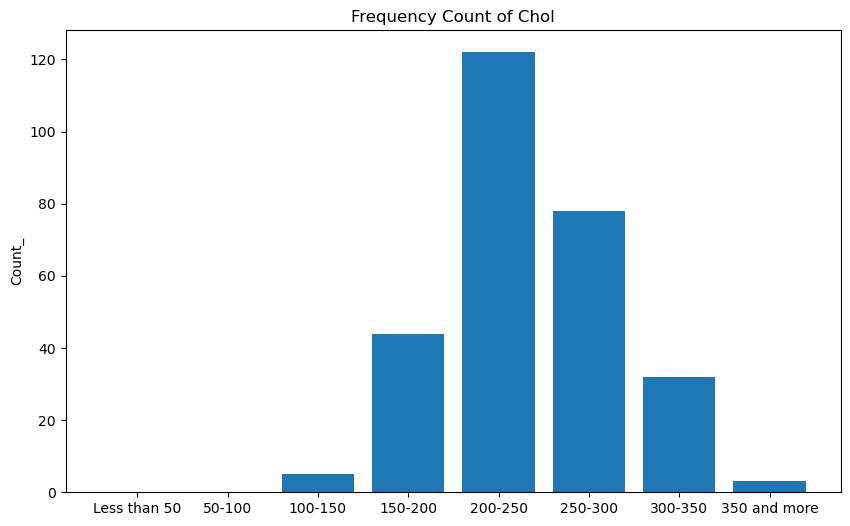

In [101]:
plt.figure(figsize=(10,6))
plt.bar(chol_df['chol'],chol_df['Count_'],)
plt.ylabel('Count_')
plt.title('Frequency Count of Chol')
plt.show()

### *Many patients have their cholestrol level ranging between 200-300 in mg/dl.

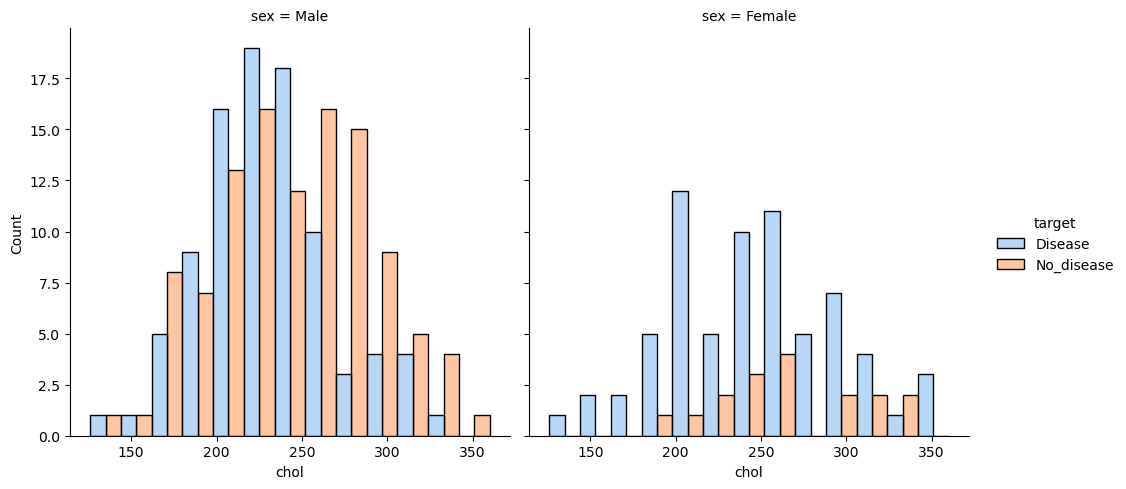

In [102]:
sns.displot(df, x="chol", col="sex", hue="target", multiple="dodge", palette="pastel")

### *Male patients have higher Cholestrol levels when compared to female patients and we can say that higher the cholestrol level, higher the chance of a patient to get affected by the CardioVascular Disease.

# 2.

In [103]:
df.slope.value_counts()

upsloping      138
flat           130
downsloping     16
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

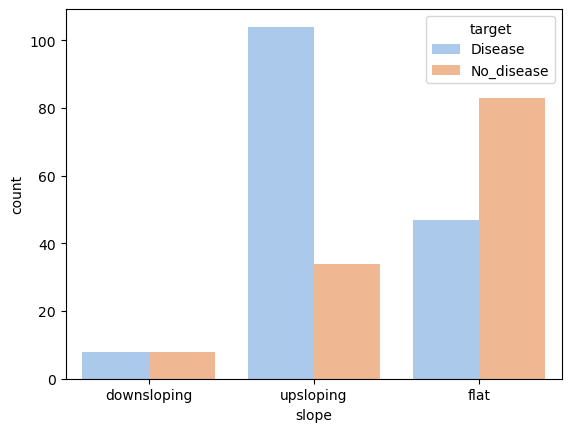

In [104]:
sns.countplot(x='slope', hue='target', data=df, palette='pastel')

### *People with upsloping peak exercising ST segment are more prone to the occurence of heart attack

<Figure size 2000x2000 with 0 Axes>

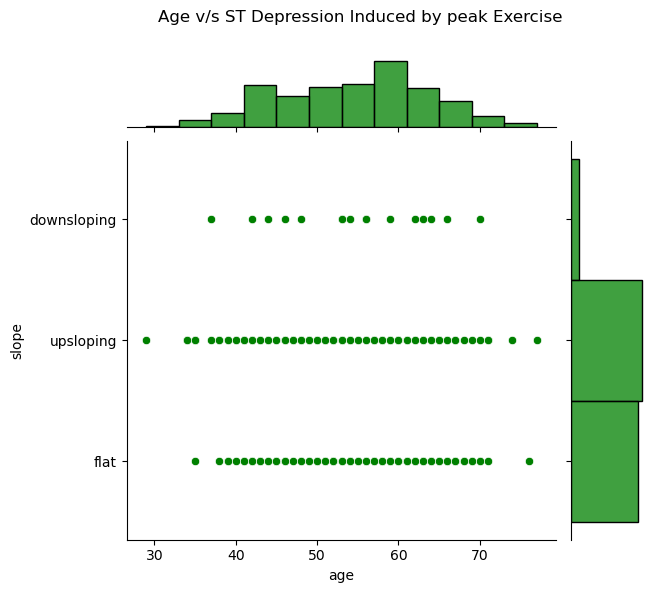

In [105]:
plt.figure(1, figsize=(20,20))
g=sns.jointplot(x="age", y="slope", data=df, color="g")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s ST Depression Induced by peak Exercise') 
plt.show()

# 3.

In [177]:
df.thal.value_counts()

0    162
2    105
1     17
Name: thal, dtype: int64

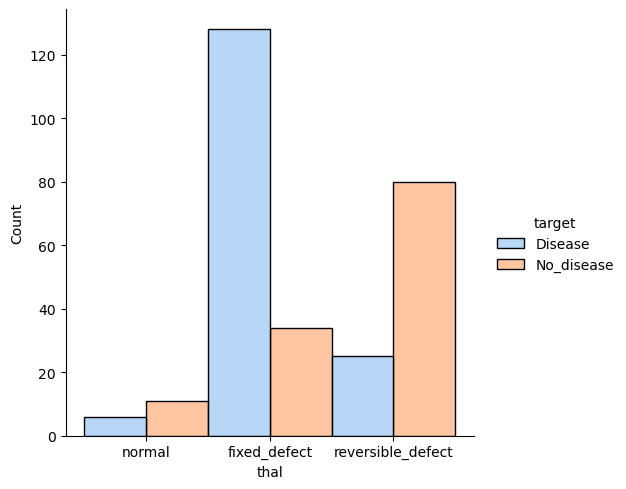

In [106]:
sns.displot(df, x="thal", hue="target", multiple="dodge", palette="pastel")

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

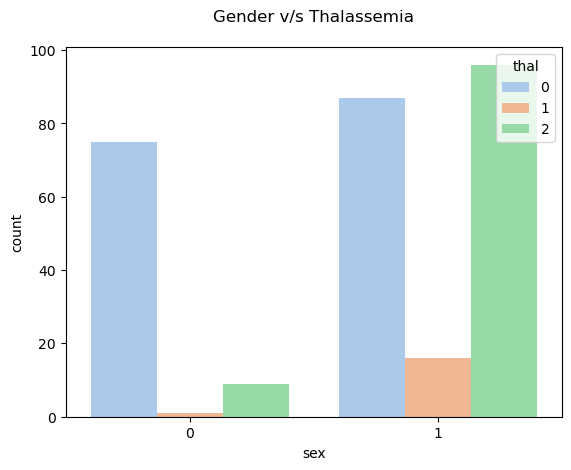

In [182]:
sns.countplot(data= df, x='sex',hue='thal', palette='pastel')
plt.title('Gender v/s Thalassemia\n')

#### * People with a fixed_defect thalassemia Value that is they do not have any blood flow to some part of the heart have the highest tendency of having a heart attack
#### * Later people who have a reversible defect thalassemia Value that is a blood flow is observed but it is not normal have a little less tendency to having a heart attack.
#### * Also we observe that more number of male patients have fixed and reversible thalassemia Value compared to female patients.

# 4.

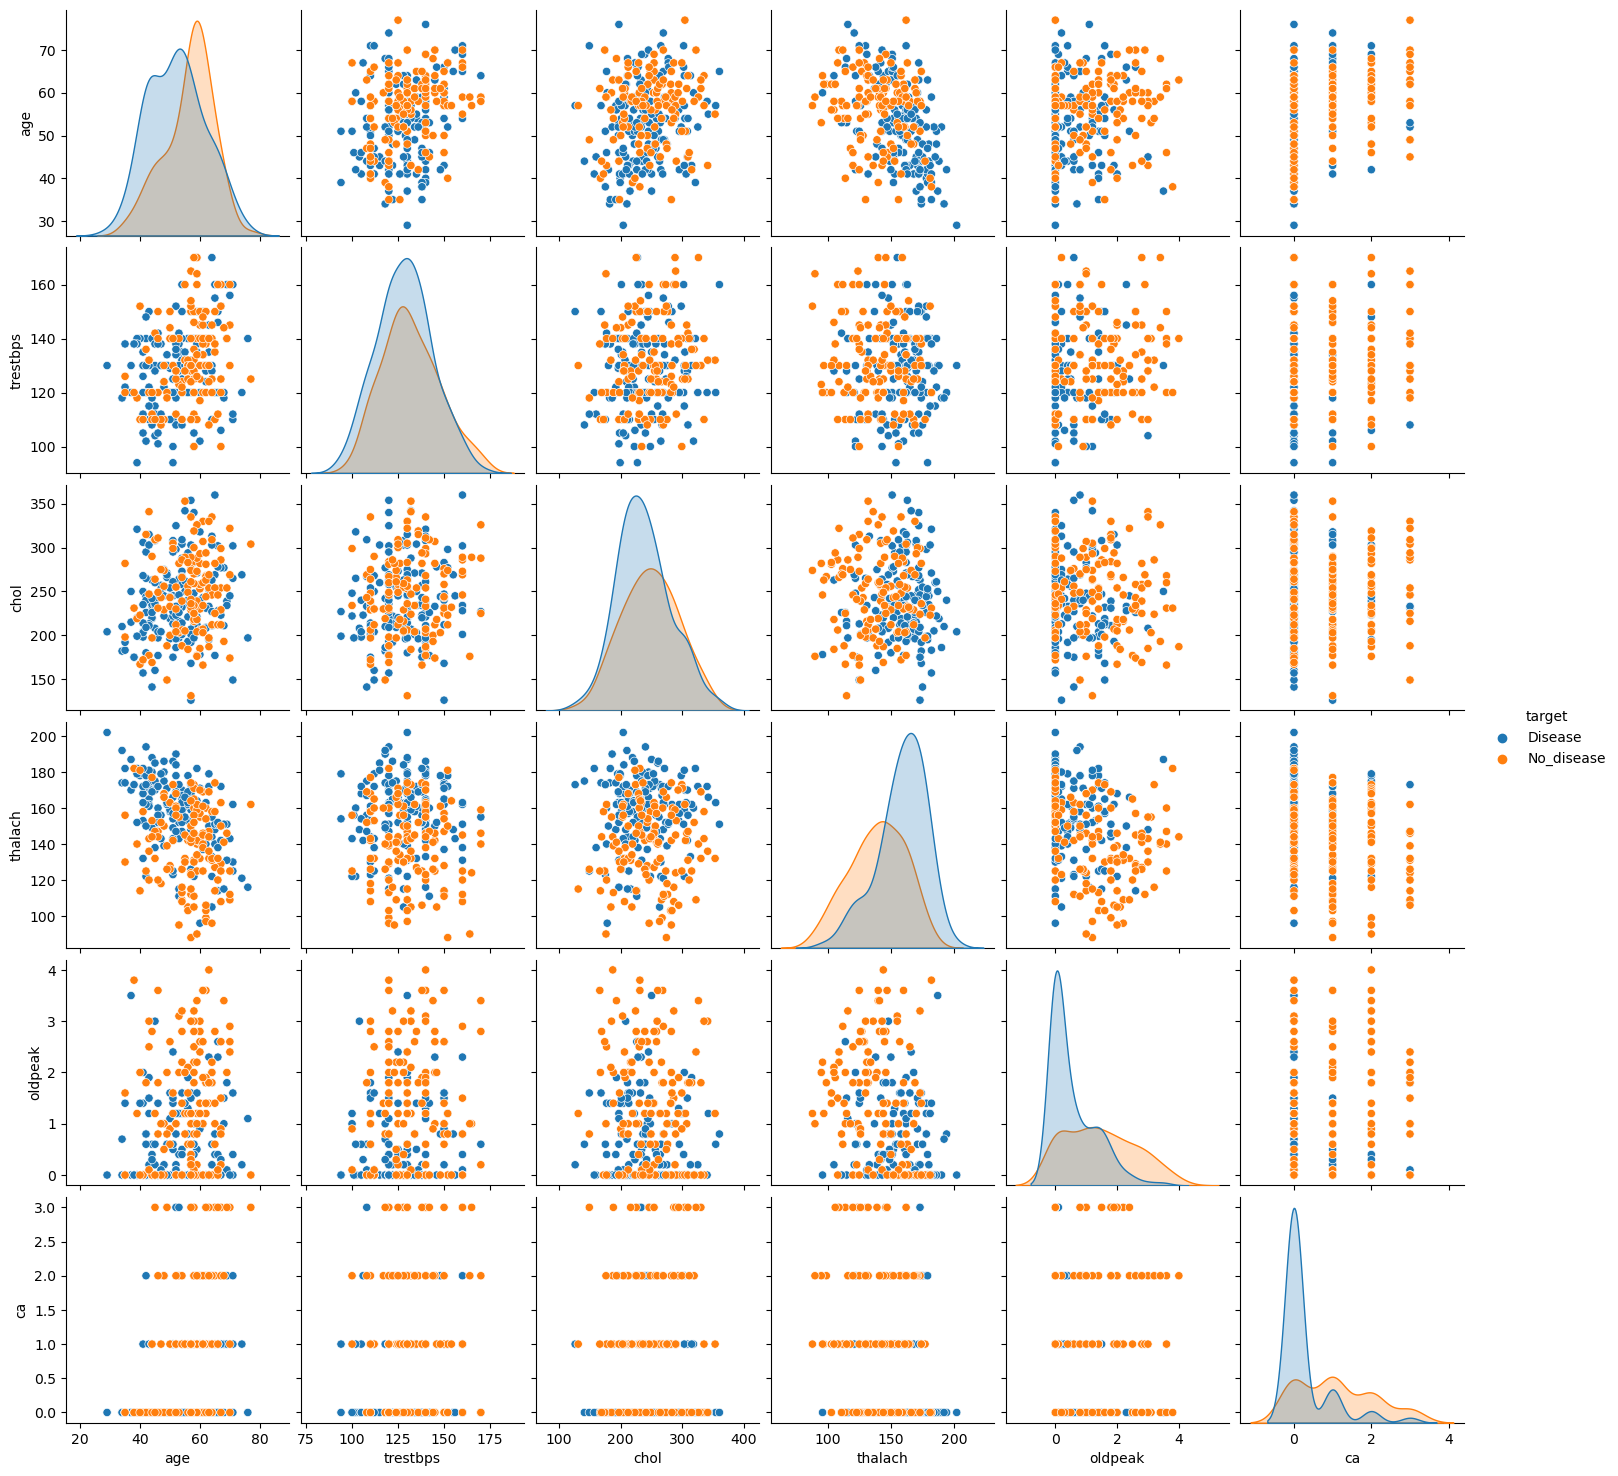

In [110]:
sns.pairplot(df, hue="target")

##### * oldpeak having a linear separation relation between disease and non-disease.
##### * thalach having a mild separation relation between disease and non-disease.
##### * other features don’t form any clear separation

# 5.

In [111]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical,145,233,True,left ventricular hypertrophy,150,No,2.3,downsloping,0.0,normal,Disease
1,37,Male,non-anginal pain,130,250,False,normal,187,No,3.5,downsloping,0.0,fixed_defect,Disease
2,41,Female,atypical_angina,130,204,False,left ventricular hypertrophy,172,No,1.4,upsloping,0.0,fixed_defect,Disease
3,56,Male,atypical_angina,120,236,False,normal,178,No,0.8,upsloping,0.0,fixed_defect,Disease
4,57,Female,asymtomatic,120,354,False,normal,163,Yes,0.6,upsloping,0.0,fixed_defect,Disease
5,57,Male,asymtomatic,140,192,False,normal,148,No,0.4,flat,0.0,normal,Disease
6,56,Female,atypical_angina,140,294,False,left ventricular hypertrophy,153,No,1.3,flat,0.0,fixed_defect,Disease
7,44,Male,atypical_angina,120,263,False,normal,173,No,0.0,upsloping,0.0,reversible_defect,Disease
9,57,Male,non-anginal pain,150,168,False,normal,174,No,1.6,upsloping,0.0,fixed_defect,Disease
10,54,Male,asymtomatic,140,239,False,normal,160,No,1.2,upsloping,0.0,fixed_defect,Disease


In [133]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['cp'] = df['cp'].astype('category')
df['cp'] = df['cp'].cat.codes

df['fbs'] = df['fbs'].astype('category')
df['fbs'] = df['fbs'].cat.codes

df['restecg'] = df['restecg'].astype('category')
df['restecg'] = df['restecg'].cat.codes

df['exang'] = df['exang'].astype('category')
df['exang'] = df['exang'].cat.codes

df['slope'] = df['slope'].astype('category')
df['slope'] = df['slope'].cat.codes

df['thal'] = df['thal'].astype('category')
df['thal'] = df['thal'].cat.codes

df['target'] = df['target'].astype('category')
df['target'] = df['target'].cat.codes

In [134]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,1,150,0,2,0,0,1,0
1,37,1,2,130,250,0,2,187,0,3,0,0,0,0
2,41,0,1,130,204,0,1,172,0,1,2,0,0,0
3,56,1,1,120,236,0,2,178,0,0,2,0,0,0
4,57,0,0,120,354,0,2,163,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,2,123,1,0,1,0,2,1
299,45,1,3,110,264,0,2,132,0,1,1,0,2,1
300,68,1,0,144,193,1,2,141,0,3,1,2,2,1
301,57,1,0,130,131,0,2,115,1,1,1,1,2,1


In [136]:
df.dtypes

age         int64
sex          int8
cp           int8
trestbps    int64
chol        int64
fbs          int8
restecg      int8
thalach     int64
exang        int8
oldpeak     int64
slope        int8
ca          int64
thal         int8
target       int8
dtype: object

In [138]:
x = df.drop(columns='target')
y = df['target']

In [139]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,1,150,0,2,0,0,1
1,37,1,2,130,250,0,2,187,0,3,0,0,0
2,41,0,1,130,204,0,1,172,0,1,2,0,0
3,56,1,1,120,236,0,2,178,0,0,2,0,0
4,57,0,0,120,354,0,2,163,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,2,123,1,0,1,0,2
299,45,1,3,110,264,0,2,132,0,1,1,0,2
300,68,1,0,144,193,1,2,141,0,3,1,2,2
301,57,1,0,130,131,0,2,115,1,1,1,1,2


In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21)

In [141]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
47,47,1,2,138,257,0,1,156,0,0,2,0,0
161,55,0,1,132,342,0,2,166,0,1,2,0,0
156,47,1,2,130,253,0,2,179,0,0,2,0,0
107,45,0,0,138,236,0,1,152,1,0,1,0,0
90,48,1,2,124,255,1,2,175,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,60,1,2,140,185,0,1,155,0,3,1,0,0
126,47,1,0,112,204,0,2,143,0,0,2,0,0
50,51,0,2,130,256,0,1,149,0,0,2,0,0
278,58,0,1,136,319,1,1,152,0,0,2,2,0


In [142]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
4,57,0,0,120,354,0,2,163,1,0,2,0,0
232,55,1,0,160,289,0,1,145,1,0,1,1,2
97,52,1,0,108,233,1,2,147,0,0,2,3,2
274,47,1,0,110,275,0,1,118,1,1,1,1,0
141,43,1,0,115,303,0,2,181,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,43,1,0,150,247,0,2,171,0,1,2,0,0
219,48,1,0,130,256,1,1,150,1,0,2,2,2
123,54,0,2,108,267,0,1,167,0,0,2,0,0
261,52,1,0,112,230,0,2,160,0,0,2,1,0


In [148]:
scaler = StandardScaler()

In [150]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [151]:
x_train_scaled

array([[-0.80589602,  0.69908641,  0.95614079, ...,  1.02012586,
        -0.69961143, -0.85941947],
       [ 0.08741349, -1.43043834, -0.01971424, ...,  1.02012586,
        -0.69961143, -0.85941947],
       [-0.80589602,  0.69908641,  0.95614079, ...,  1.02012586,
        -0.69961143, -0.85941947],
       ...,
       [-0.35924126, -1.43043834,  0.95614079, ...,  1.02012586,
        -0.69961143, -0.85941947],
       [ 0.42240456, -1.43043834, -0.01971424, ...,  1.02012586,
         1.49916736, -0.85941947],
       [-1.25255078, -1.43043834, -0.99556927, ..., -0.649171  ,
        -0.69961143,  1.24138368]])

In [152]:
x_test_scaled

array([[ 0.31074087, -1.43043834, -0.99556927, ...,  1.02012586,
        -0.69961143, -0.85941947],
       [ 0.08741349,  0.69908641, -0.99556927, ..., -0.649171  ,
         0.39977796,  1.24138368],
       [-0.24757757,  0.69908641, -0.99556927, ...,  1.02012586,
         2.59855676,  1.24138368],
       ...,
       [-0.0242502 , -1.43043834,  0.95614079, ...,  1.02012586,
        -0.69961143, -0.85941947],
       [-0.24757757,  0.69908641, -0.99556927, ...,  1.02012586,
         0.39977796, -0.85941947],
       [ 1.76236884,  0.69908641, -0.01971424, ...,  1.02012586,
        -0.69961143, -0.85941947]])

In [153]:
log_reg = LogisticRegression(random_state = 0).fit(x_train_scaled, y_train)

In [154]:
log_reg.predict(x_train_scaled)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
      dtype=int8)

In [155]:
log_reg.score(x_train_scaled, y_train)

0.8838383838383839

In [156]:
log_reg.score(x_test_scaled, y_test)

0.8488372093023255

In [161]:
log_reg1 = LogisticRegression(random_state = 0,
                             C = 1,
                             fit_intercept = True
                             ).fit(x_train_scaled, y_train)

In [162]:
log_reg1.score(x_train_scaled, y_train)

0.8838383838383839

#### *Both the logistic Regression values have the same accuracy value close to train data 89% and test data 85%

In [163]:
y_pred = log_reg1.predict(x_test_scaled)

In [164]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int8)

In [166]:
confusion_matrix(y_test, y_pred)

array([[44,  3],
       [10, 29]])

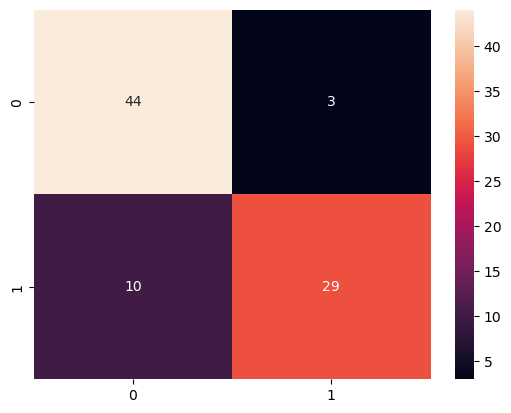

In [175]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

### The Confusion Matrix True Positive value is 44 and true Negative was 29. And the False Positive came out to be 3 and False Negative is 10.


In [174]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        47
           1       0.91      0.74      0.82        39

    accuracy                           0.85        86
   macro avg       0.86      0.84      0.84        86
weighted avg       0.86      0.85      0.85        86



### The classification report of the model shows that 91% prediction of absence of heart disease was predicted correct and 81% of presence of heart disease was predicted correct.